In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

from math import pi

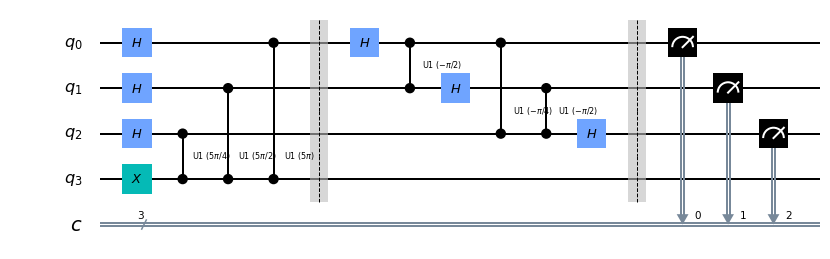

In [2]:
#  U is u1(THETA)
# 3/8 * 2*pi --> pick at 3
# 5/8 * 2*pi --> pick at 5
# 6/8 * 2*pi + 0.1 --> pick at 6 with other small probabilities for other values
# and so on
THETA = 5/8 * 2*pi

qc = QuantumCircuit(4, 3)

# Phase kick back part of phase estimation
for qubit in range(3):
    qc.h(qubit)
qc.x(3) # |psi> = |1>

qc.cu1(THETA, 2, 3)
qc.cu1(THETA*2, 1, 3)
qc.cu1(THETA*4, 0, 3)

# Inverse quantum Fourier transform for 3 bits
qc.barrier()
qc.h(0)
qc.cu1(-2*pi/4, 0, 1) # R_2 is cu1(2*pi/4), R_2^{dagger} is cu1(-2*pi/4)
qc.h(1)
qc.cu1(-2*pi/8, 0, 2) # ...
qc.cu1(-2*pi/4, 1, 2) # ...
qc.h(2)

# Measurement
qc.barrier()
for n in range(3):
    qc.measure(n,n)

qc.draw(output='mpl')

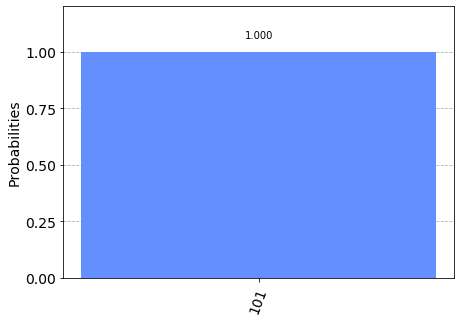

In [3]:
r = execute(qc, backend=Aer.get_backend('qasm_simulator'),
            shots=1024).result().get_counts()

plot_histogram(r)